## Problem Statement
### Introduction
Solving this assignment will give you an idea about how real business problems are solved using EDA. In this case study, apart from applying the techniques you have learnt in EDA, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

  

### Business Understanding
You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

   * If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

   * If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

 

The data given below contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

 

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

<p>
<img src ="https://cdn.upgrad.com/UpGrad/temp/7afbce98-8ecc-41c6-96d8-981cba7d343f/Loan_image.png" alt='Figure 1'>
<center> <b>Figure 1. Loan Data Set</b> </center> 
 </br>  
</p>

When a person applies for a loan, there are two types of decisions that could be taken by the company:

1. Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

     * Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

     * Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

     * Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

2. Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)
 

### Business Objectives
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics (understanding the types of variables and their significance should be enough). 

### Data Understanding
 
Download the dataset from below. It contains the complete loan data for all loans issued through the time period 2007 t0 2011.

## Importing packages

In [1]:
import pkg_resources
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
version = pkg_resources.get_distribution("seaborn").version
version
# Remove waringns
import warnings
warnings.filterwarnings('ignore')

## Load the Data

In [9]:
data = pd.read_csv(r'loan.csv')
data_dict = pd.read_excel('Data_Dictionary.xlsx')
data_dict.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


### Explore the Data

In [11]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [13]:
data.shape

(39717, 111)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [16]:
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


### Data Cleaning and Preprocessing:

* Handle missing values.
* Handle duplicate data.
* Convert data types if necessary (e.g., converting strings to dates or numeric values).
* Remove unnecessary columns.

In [17]:
# Check for empty data
data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [18]:
# Check which all columns have all empty
data.isnull().all()

id                            False
member_id                     False
loan_amnt                     False
funded_amnt                   False
funded_amnt_inv               False
                              ...  
tax_liens                     False
tot_hi_cred_lim                True
total_bal_ex_mort              True
total_bc_limit                 True
total_il_high_credit_limit     True
Length: 111, dtype: bool

In [19]:
#drop all the empty columns
data.dropna(axis=1,how='all',inplace=True)

In [20]:
# Calculate the percentage of missing data for each column
missing_percentage = (data.isnull().mean() * 100).round(2)
missing_percentage

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.59
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [21]:
#Identify columns with more than 50% missing data
columns_to_drop = missing_percentage[missing_percentage > 50].index
columns_to_drop

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'], dtype='object')

In [22]:
# drop the columns from the dataset
data_cleaned = data.drop(columns=columns_to_drop)
#Identify columns with more than 50% NA data
missing_percentage = (data_cleaned.isna().sum() / len(data)) * 100
columns_to_drop = missing_percentage[missing_percentage > 50].index
columns_to_drop
data_cleaned.drop(columns=columns_to_drop)
#Identify columns where more than 50% data has a value of 0, Ba careful and compare the columns with Data dictionary
missing_percentage = (data_cleaned.eq(0).sum() / len(data)) * 100
missing_percentage
columns_to_drop = missing_percentage[missing_percentage > 50].index
columns_to_drop
data_cleaned.drop(columns=columns_to_drop)
data_cleaned
# Let's do some manual analysis and remove those columns that we don't need
data_cleaned.to_csv('cleaned_loan.csv', index=False)


## Manual removal of the unrequired columns

In [23]:
# These columns are not helpful for our analysis hence dropping them
data_cleaned.drop(['id', 'member_id', 'url', 'title', 'emp_title', 'last_credit_pull_d','desc','out_prncp_inv','total_pymnt_inv', 'out_prncp', 'total_rec_prncp', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt' , 'pymnt_plan', 'initial_list_status','collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)
data_cleaned.head()


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_rec_int,chargeoff_within_12_mths,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,1,3,0,13648,83.70%,9,5863.155187,863.16,0.0,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,5,3,0,1687,9.40%,4,1008.710000,435.17,0.0,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,2,2,0,2956,98.50%,10,3005.666844,605.67,0.0,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,1,10,0,5598,21%,37,12231.890000,2214.92,0.0,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,0,15,0,27783,53.90%,38,3513.330000,1037.39,0.0,0.0


## Function to remove outliers

In [24]:
def remove_outliers_from_column(data, column_name):
    # Calculate the 5th and 95th percentiles
    percentile_5 = data[column_name].quantile(0.05)
    print(percentile_5)
    percentile_95 = data[column_name].quantile(0.95)
    print(percentile_95)
    # Filter data to exclude values outside the 5th and 95th percentiles
    filtered_data = data[(data[column_name] <= percentile_95)]
    
    return filtered_data

## Count of Categorical and Numeric columns

In [25]:
categorical_vars = data_cleaned.select_dtypes(include=['object', 'category', 'bool'])

# Identify Numerical Variables
numerical_vars = data_cleaned.select_dtypes(include=['int64', 'float64'])

# Display the lists of categorical and numerical variables
print("\nCategorical Variables:")
print(categorical_vars.columns.tolist())

print("\nNumerical Variables:")
print(numerical_vars.columns.tolist())


Categorical Variables:
['term', 'int_rate', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'earliest_cr_line', 'revol_util']

Numerical Variables:
['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'total_pymnt', 'total_rec_int', 'chargeoff_within_12_mths', 'pub_rec_bankruptcies']


## Now time to derive some columns from the given data

In [29]:
data_cleaned['int_rate'] = data_cleaned['int_rate'].str.rstrip('%')
data_cleaned['term_months'] = data_cleaned['term'].str.rstrip('months')
temp_issue_d = data_cleaned['issue_d'].str.split('-', expand=True)
data_cleaned['issue_d_month'] = temp_issue_d[0]
data_cleaned['issue_d_year'] = '20' + temp_issue_d[1]
data_cleaned['emp_length_years'] = data_cleaned['emp_length'].str.rstrip('years ')
data_cleaned['emp_length_years'].replace({'10+': '10'}, inplace=True)
data_cleaned['emp_length_years'][data_cleaned['emp_length_years'] == '< 1'] = '0.5'
data_cleaned['revol_util'] = data_cleaned['revol_util'].str.rstrip('%')
data_cleaned['annual_inc_lpa'] = data_cleaned['annual_inc'] / 100000
data_cleaned.drop(['issue_d', 'term', 'emp_length'], axis=1, inplace=True)


In [30]:
columns_category = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 
           'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies']
data_cleaned[columns_category] = data_cleaned[columns_category].apply(lambda x: x.astype('category'))
# Let's update the datatypes of the derived columns
columns_int = ['int_rate', 'emp_length_years', 'revol_util', 'term_months', 'issue_d_year']
data_cleaned[columns_int] = data_cleaned[columns_int].astype('float64')
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   loan_amnt                 39717 non-null  int64   
 1   funded_amnt               39717 non-null  int64   
 2   funded_amnt_inv           39717 non-null  float64 
 3   int_rate                  39717 non-null  float64 
 4   installment               39717 non-null  float64 
 5   grade                     39717 non-null  category
 6   sub_grade                 39717 non-null  category
 7   home_ownership            39717 non-null  category
 8   annual_inc                39717 non-null  float64 
 9   verification_status       39717 non-null  category
 10  loan_status               39717 non-null  category
 11  purpose                   39717 non-null  category
 12  zip_code                  39717 non-null  object  
 13  addr_state                39717 non-null  cate

## Data Imputation

In [31]:
# Remove current loan status as it's not needed in the analysis
data_cleaned['loan_status'] = data_cleaned['loan_status'].str.strip()
data_cleaned = data_cleaned[data_cleaned.loan_status != 'Current']

# Remove columns with only one unique value
data_cleaned = data_cleaned.loc[:, data_cleaned.nunique() != 1]

In [32]:
## Final dataset for Exploratory Data Analytics
df = data_cleaned
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'grade', 'sub_grade', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_pymnt', 'total_rec_int', 'pub_rec_bankruptcies',
       'term_months', 'issue_d_month', 'issue_d_year', 'emp_length_years',
       'annual_inc_lpa'],
      dtype='object')

In [33]:
# columns with missing values
missing_percentage = (data_cleaned.isna().mean() * 100).round(2)
missing_percentage

loan_amnt               0.00
funded_amnt             0.00
funded_amnt_inv         0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
loan_status             0.00
purpose                 0.00
zip_code                0.00
addr_state              0.00
dti                     0.00
delinq_2yrs             0.00
earliest_cr_line        0.00
inq_last_6mths          0.00
open_acc                0.00
pub_rec                 0.00
revol_bal               0.00
revol_util              0.13
total_acc               0.00
total_pymnt             0.00
total_rec_int           0.00
pub_rec_bankruptcies    1.81
term_months             0.00
issue_d_month           0.00
issue_d_year            0.00
emp_length_years        2.68
annual_inc_lpa          0.00
dtype: float64

In [34]:
# Emp length in Years and pub_rec_bankruptcies has some missing values
# Let's understand the median or mode to imputate data
df['emp_length_years'].value_counts()
df['emp_length_years'].mean()
df['emp_length_years'].median()
df['emp_length_years'].mode()
# As it looks like a categorical/ordinal value using mode to imputate the data makes sense
df['emp_length_years'].fillna(df['emp_length_years'].mode()[0], inplace = True)
df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].mode()[0], inplace = True)
missing_percentage = (data_cleaned.isna().mean() * 100).round(2)
missing_percentage

loan_amnt               0.00
funded_amnt             0.00
funded_amnt_inv         0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
loan_status             0.00
purpose                 0.00
zip_code                0.00
addr_state              0.00
dti                     0.00
delinq_2yrs             0.00
earliest_cr_line        0.00
inq_last_6mths          0.00
open_acc                0.00
pub_rec                 0.00
revol_bal               0.00
revol_util              0.13
total_acc               0.00
total_pymnt             0.00
total_rec_int           0.00
pub_rec_bankruptcies    0.00
term_months             0.00
issue_d_month           0.00
issue_d_year            0.00
emp_length_years        0.00
annual_inc_lpa          0.00
dtype: float64

## Let's begin EDA

In [35]:
df["loan_status"].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64

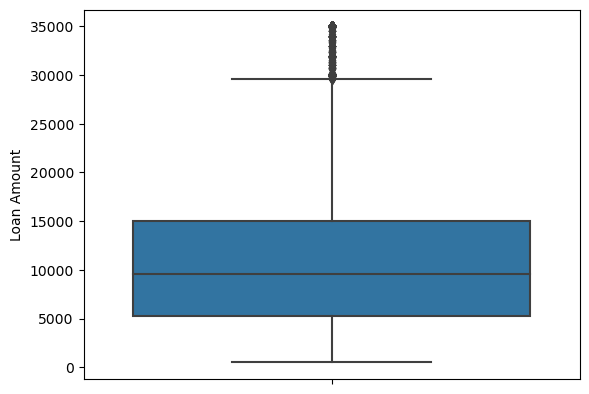

In [36]:
sns.boxplot( y=df["loan_amnt"] )
plt.ylabel('Loan Amount')
plt.show()

**Inference:** The loan amount varies from 0 to 35,000 having mean of 10,000

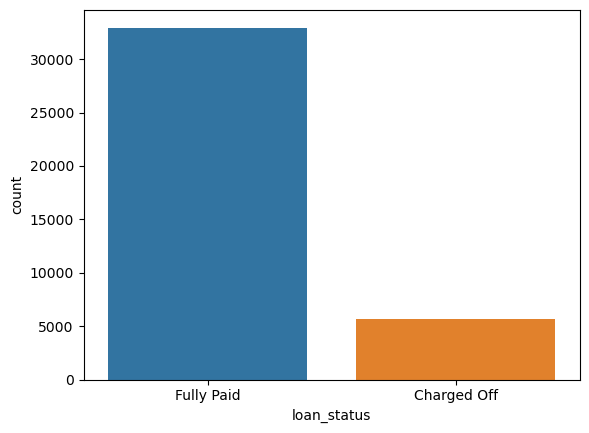

In [37]:
sns.countplot(x= df["loan_status"])
plt.show()

In [38]:
df["loan_status"].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64

**Inference:** 
1. Most of the loans are Fully Paid. 
2. About 14% of loans got default
3. Its a case of class imbalance here.

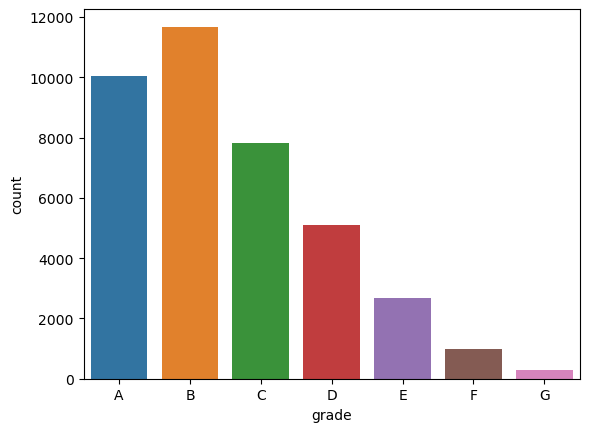

In [39]:
sns.countplot(x='grade', data=df)
plt.show()

**Inference:** Most of the loans have grade of A and B. Therefore stating most of the loans are high graded loans

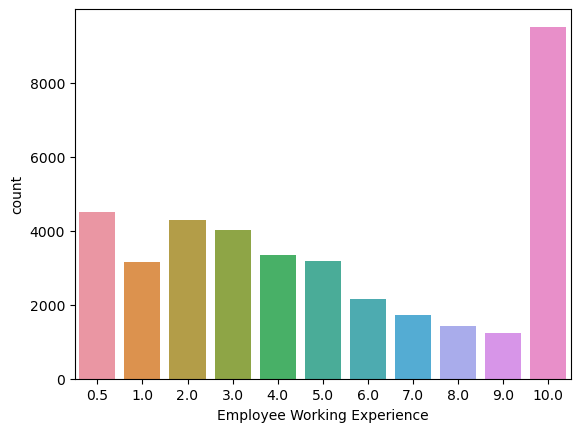

In [40]:
sns.countplot(x='emp_length_years', data=df)
plt.xlabel('Employee Working Experience')
plt.show()

**Inference:** Majority of employees applying for the loan have more than 10 years of experience

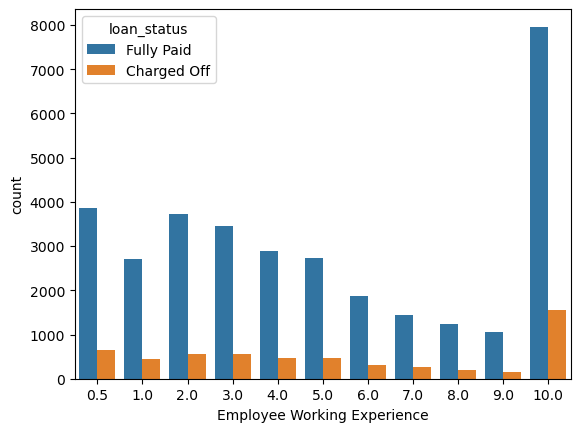

In [41]:
sns.countplot(x='emp_length_years', hue='loan_status', data=df)
plt.xlabel('Employee Working Experience')
plt.show()

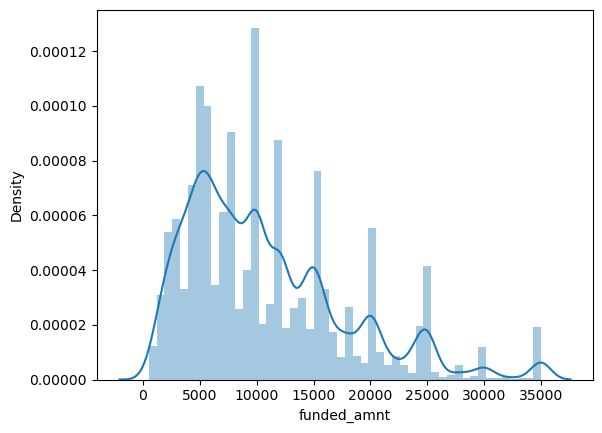

In [42]:
sns.distplot(df['funded_amnt'])
plt.show()

**Inference:** Funded amount is left skewed. Most of the loan amount given is 5 lakhs

0.24
1.40004


Text(0.5, 0, 'Income in LPA')

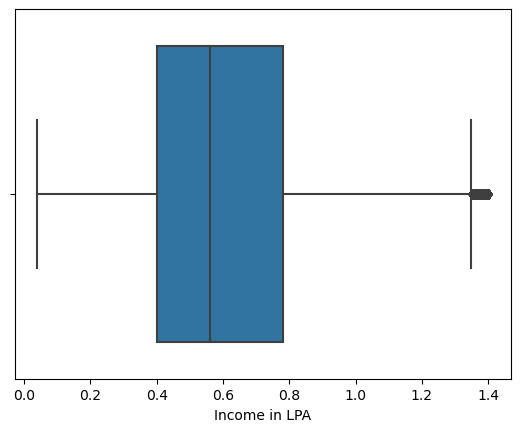

In [43]:
# Before outlier treatment
df = remove_outliers_from_column(df, 'annual_inc_lpa')
sns.boxplot(x=df['annual_inc_lpa'])
plt.xlabel('Income in LPA')
# After outlier treatment


**Inference:** There are only two applicants having annual income of more than 30 lakhs

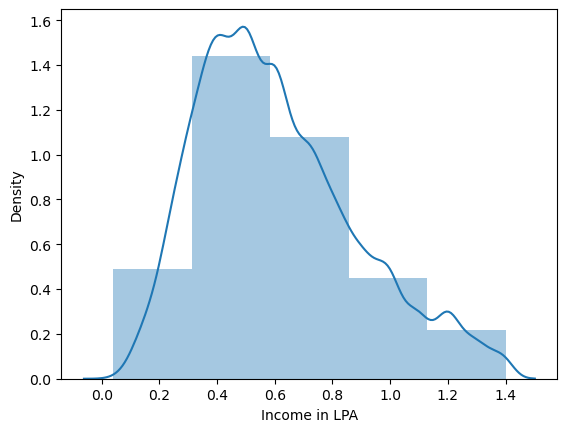

In [47]:

sns.distplot(df['annual_inc_lpa'], bins=5)
plt.xlabel('Income in LPA')
plt.show()

**Inference:** Majority of loan applicants have income less than 2 lakhs

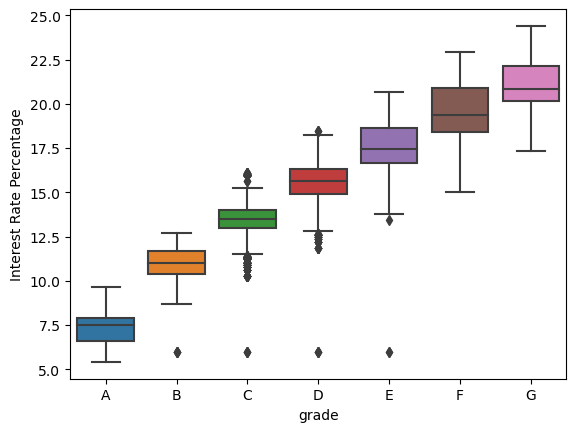

In [48]:
sns.boxplot(y='int_rate', x='grade', data=df)
plt.ylabel('Interest Rate Percentage')
plt.show()

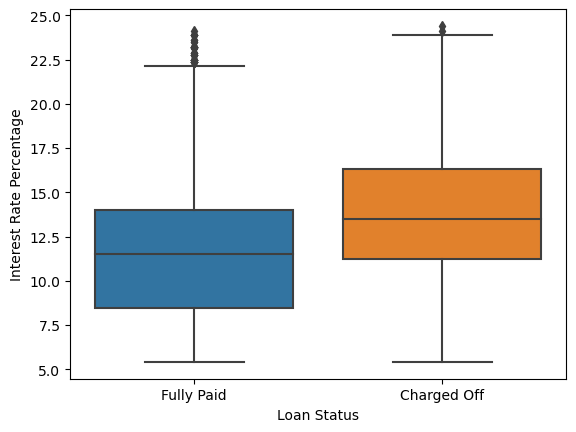

In [49]:
sns.boxplot(y='int_rate', x='loan_status', data=df)
plt.ylabel('Interest Rate Percentage')
plt.xlabel('Loan Status')
plt.show()

## Segmented Univariate Analysis

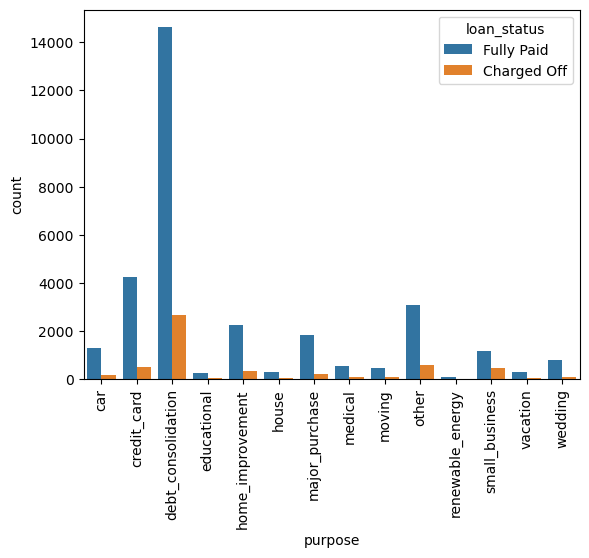

In [50]:
sns.countplot(x='purpose', hue="loan_status", data=df)
plt.xticks(rotation=90)
plt.show()

**Inference:** Majority of loan has been given for the debt consolidation purpose and has been fully paid.

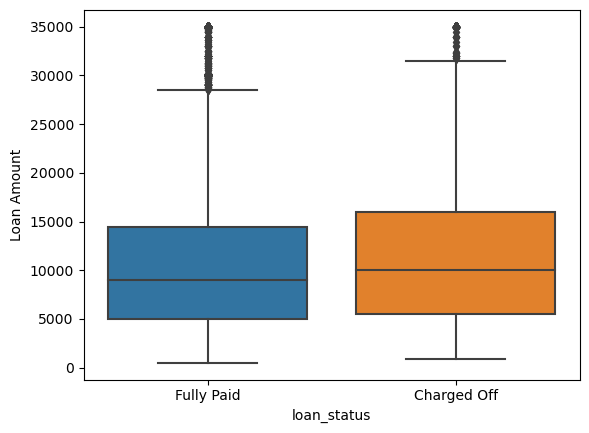

In [51]:
sns.boxplot( y="loan_amnt", x='loan_status' , data=df)
plt.ylabel('Loan Amount')
plt.show()

**Inference:** Mean, 25% and 75% Loan amount of Fully paid and charged off is exactly same

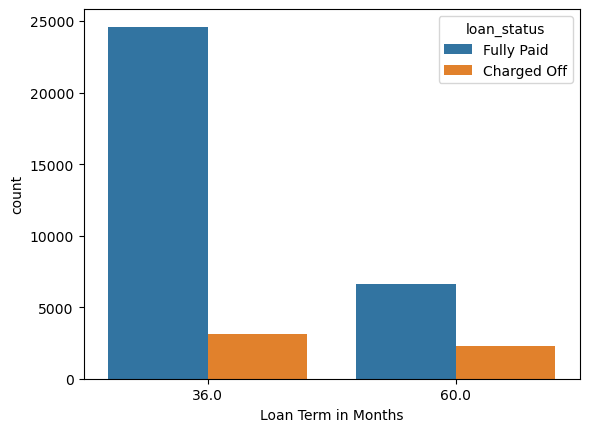

In [52]:
sns.countplot( x="term_months", hue='loan_status', data=df)
plt.xlabel('Loan Term in Months')
plt.show()

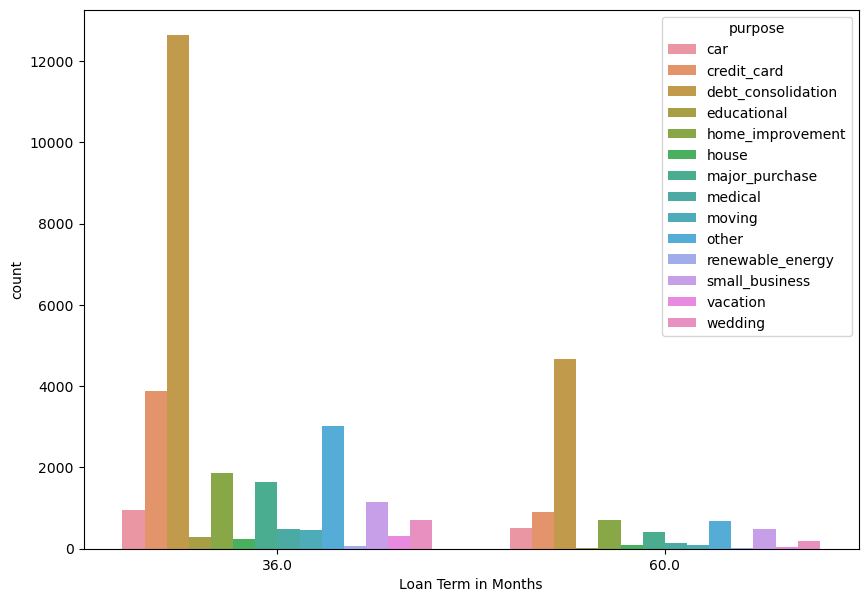

In [53]:
plt.figure(figsize=(10,7))
sns.countplot( x="term_months", hue='purpose', data=df)
plt.xlabel('Loan Term in Months')
plt.show()

**Inference:** Tenure of 36 months have have high chances to be defaulters

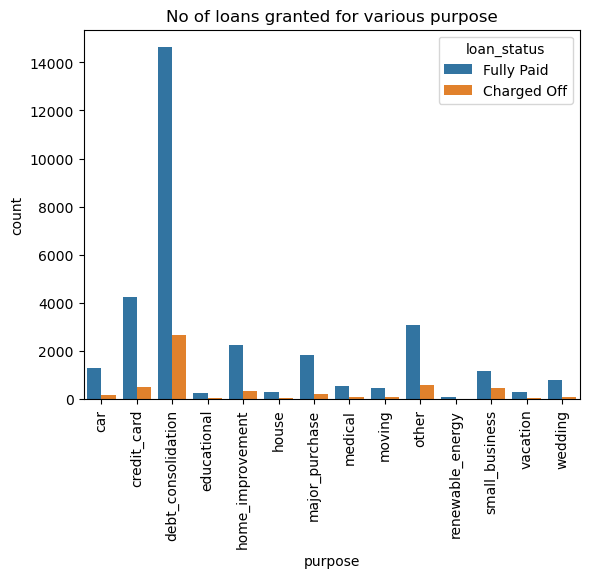

In [54]:
sns.countplot(x='purpose', hue='loan_status', data=df)
plt.title('No of loans granted for various purpose')
plt.xticks(rotation=90)
plt.show()

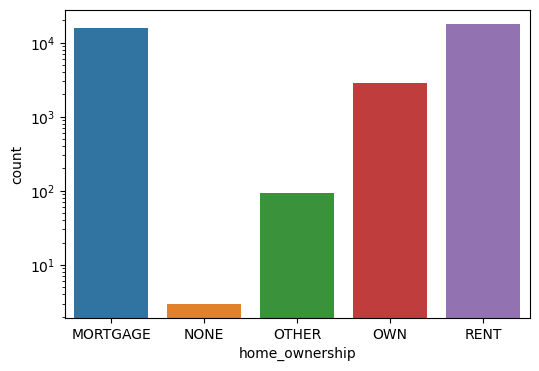

In [55]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=df)
plt.show()

## Bivariate Plots

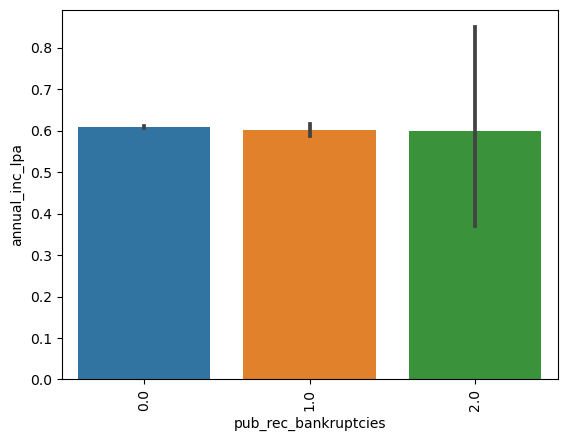

In [56]:
sns.barplot(y='annual_inc_lpa', x='pub_rec_bankruptcies', data=df)
plt.xticks(rotation=90)
plt.show()

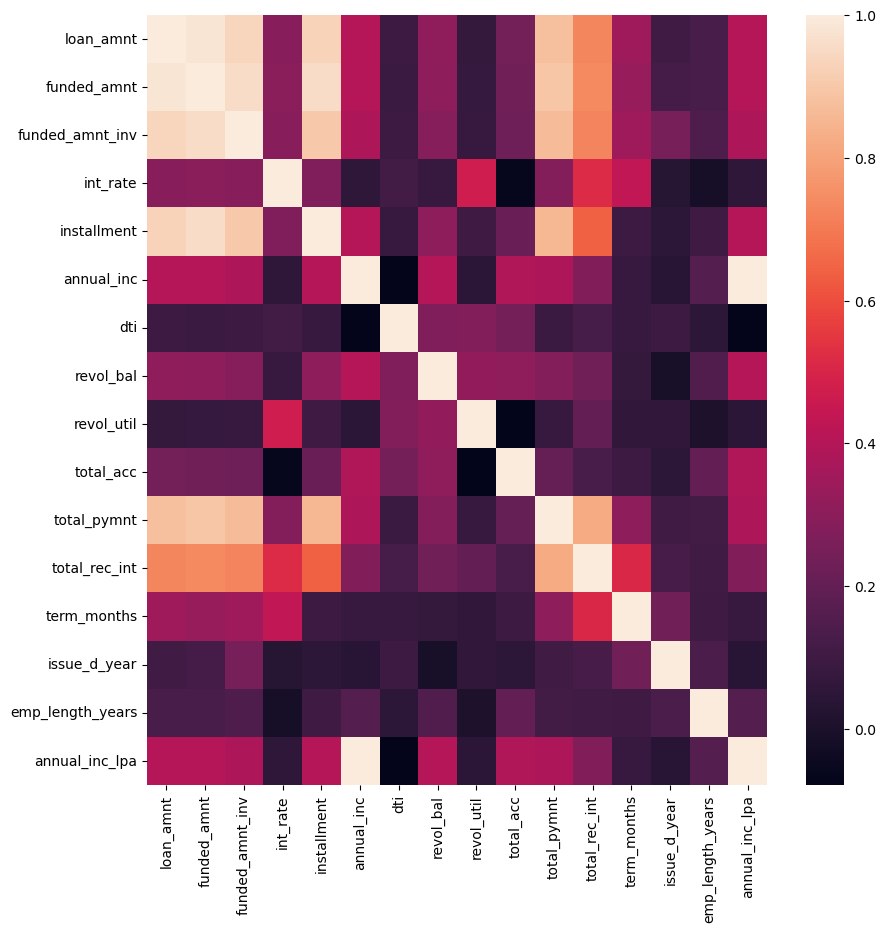

In [59]:
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(10, 10))
sns.heatmap(numeric_df.corr())
plt.show()


**Inference:** Mean, 25% and 75% Loan amount of Fully paid and charged off is exactly same

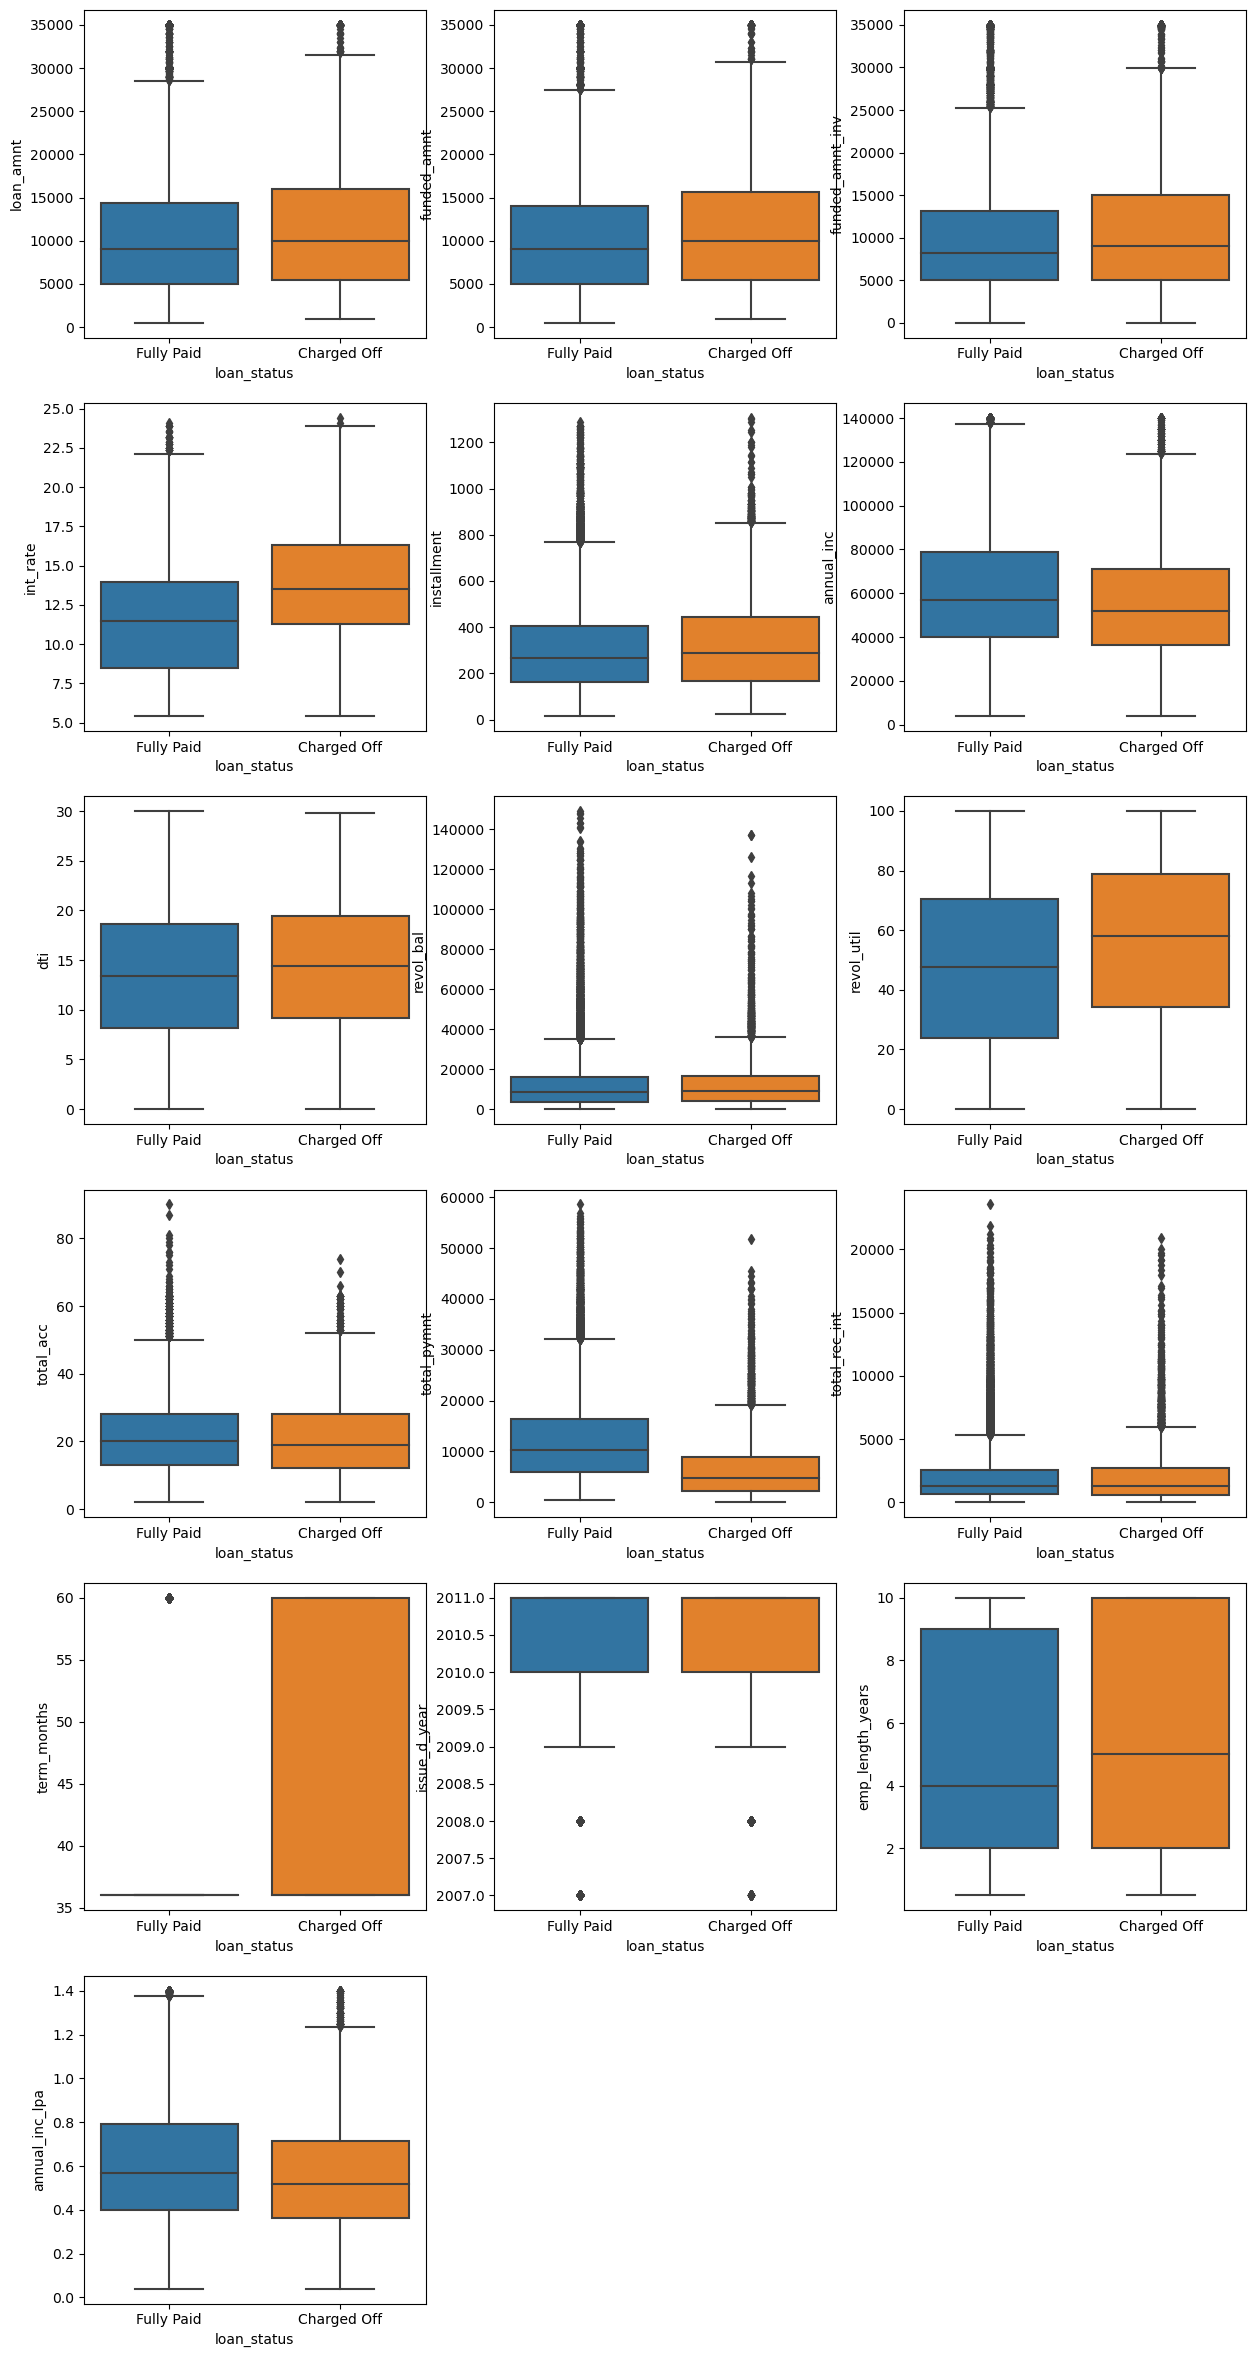

In [60]:
plt.figure(figsize=(15,40))
numeric_data = data_cleaned.select_dtypes(include = [np.number])
for i in range(len(numeric_data.columns)):
    plt.subplot(8,3, i + 1)
    sns.boxplot(y=numeric_data.columns[i], x='loan_status', data=df)

plt.show()

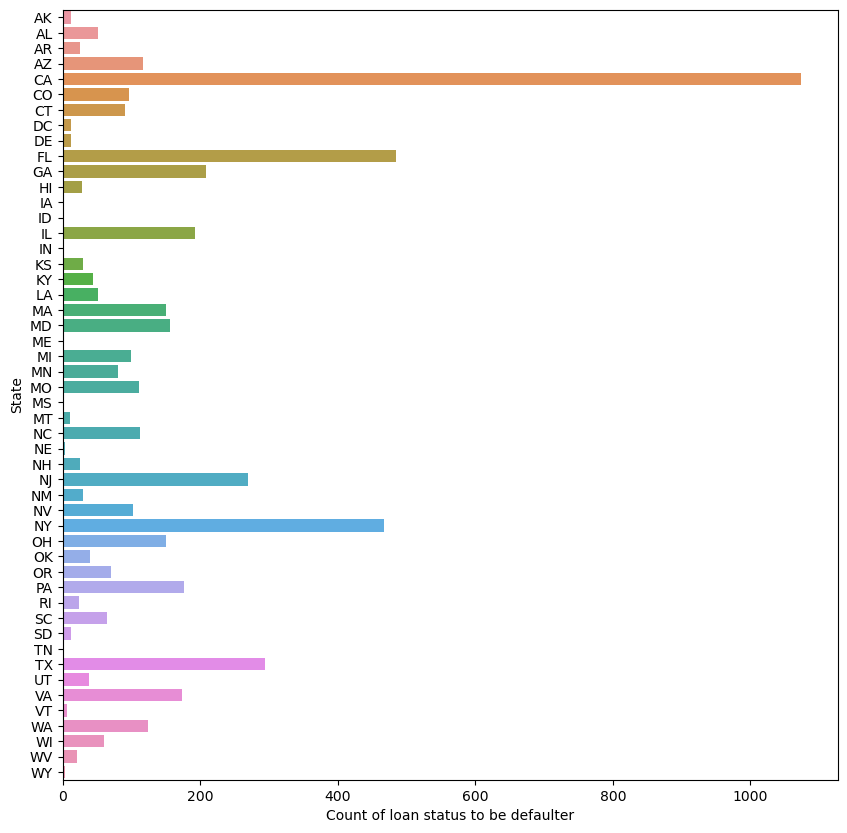

In [61]:
g = df[df['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(y='addr_state', x='loan_status', data=g)
plt.xlabel('Count of loan status to be defaulter')
plt.ylabel('State')
plt.show()

**Inference:** Applicants from the state CA are having high probability to be default

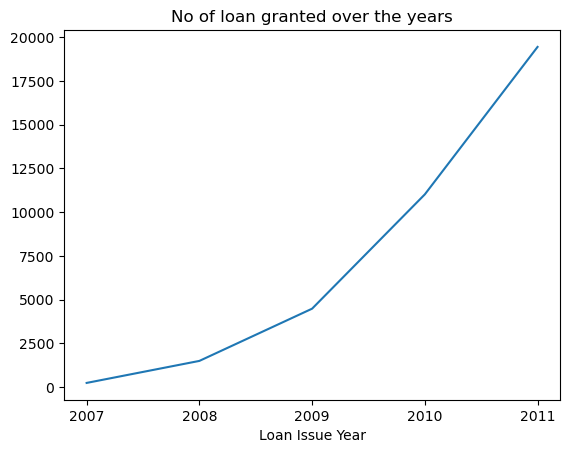

In [62]:
g = df.groupby('issue_d_year')['loan_status'].count()

g.plot.line(x_compat=True)
plt.xticks(np.arange(min(g.index), max(g.index)+1, 1.0))
plt.title('No of loan granted over the years')
plt.xlabel('Loan Issue Year')
plt.show()

**Inference:** Loan Applicants have been increasing exponentially from year 2007 to 2011

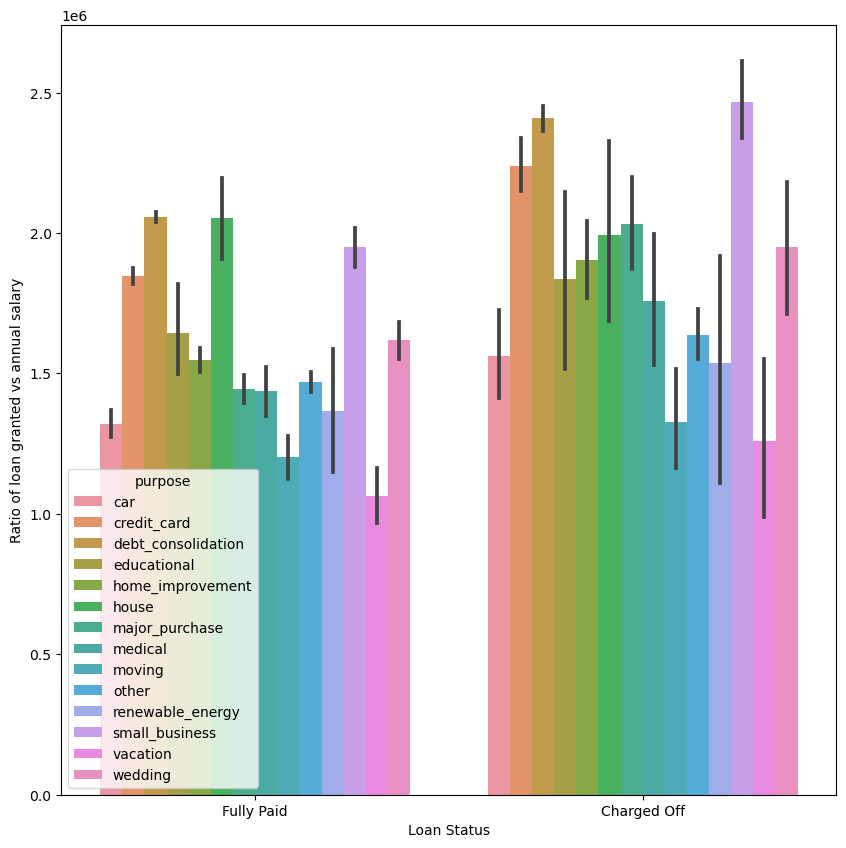

In [66]:
plt.figure(figsize=(10,10))
df['loan_income_ratio'] = df.funded_amnt*100/df.annual_inc_lpa
sns.barplot(x='loan_status',y='loan_income_ratio',hue='purpose',data=df)
plt.xlabel('Loan Status')
plt.ylabel('Ratio of loan granted vs annual salary')
plt.show()

In [67]:
df_agg = df[df['funded_amnt'] > 7000].groupby(['loan_status'])['funded_amnt'].count().reset_index()

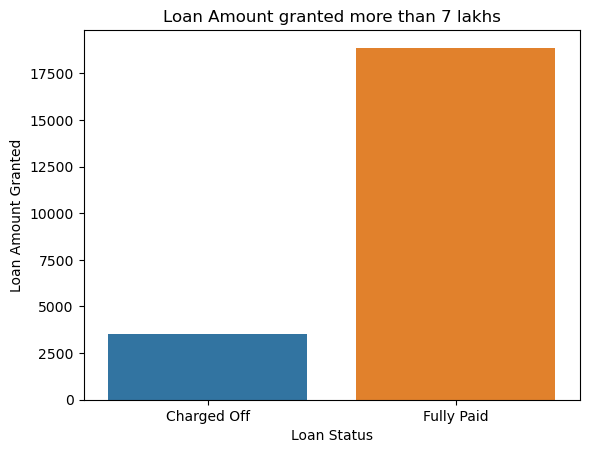

In [68]:
sns.barplot(x='loan_status', y='funded_amnt', data=df_agg)
plt.title('Loan Amount granted more than 7 lakhs')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount Granted')
plt.show()

<Axes: xlabel='issue_d_month', ylabel='count'>

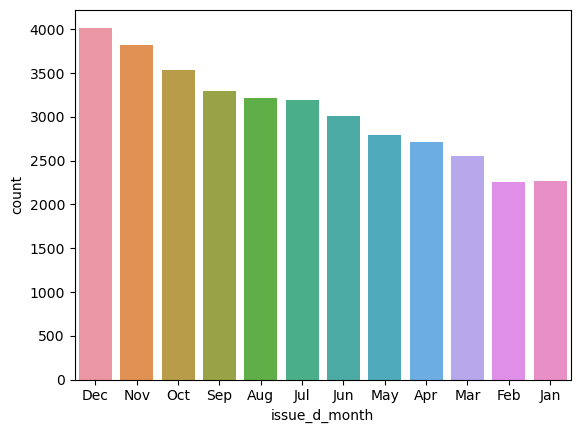

In [69]:
sns.countplot(x='issue_d_month', data=df)

<Axes: xlabel='issue_d_year', ylabel='count'>

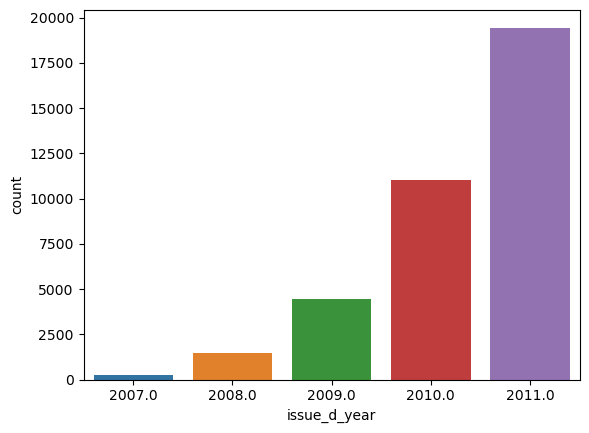

In [70]:
sns.countplot(x='issue_d_year', data=df)

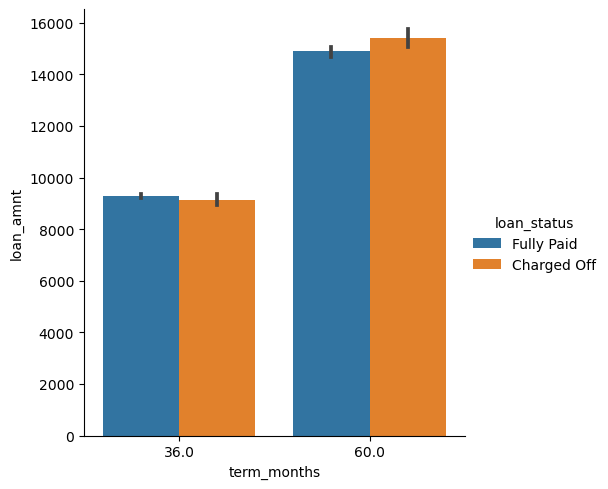

In [71]:
sns.catplot(x = 'term_months', y = 'loan_amnt', data = df,hue = 'loan_status', kind = 'bar')